In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
%matplotlib inline

# Import Data

In [2]:
df = pd.read_csv('USA_Housing.csv')

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


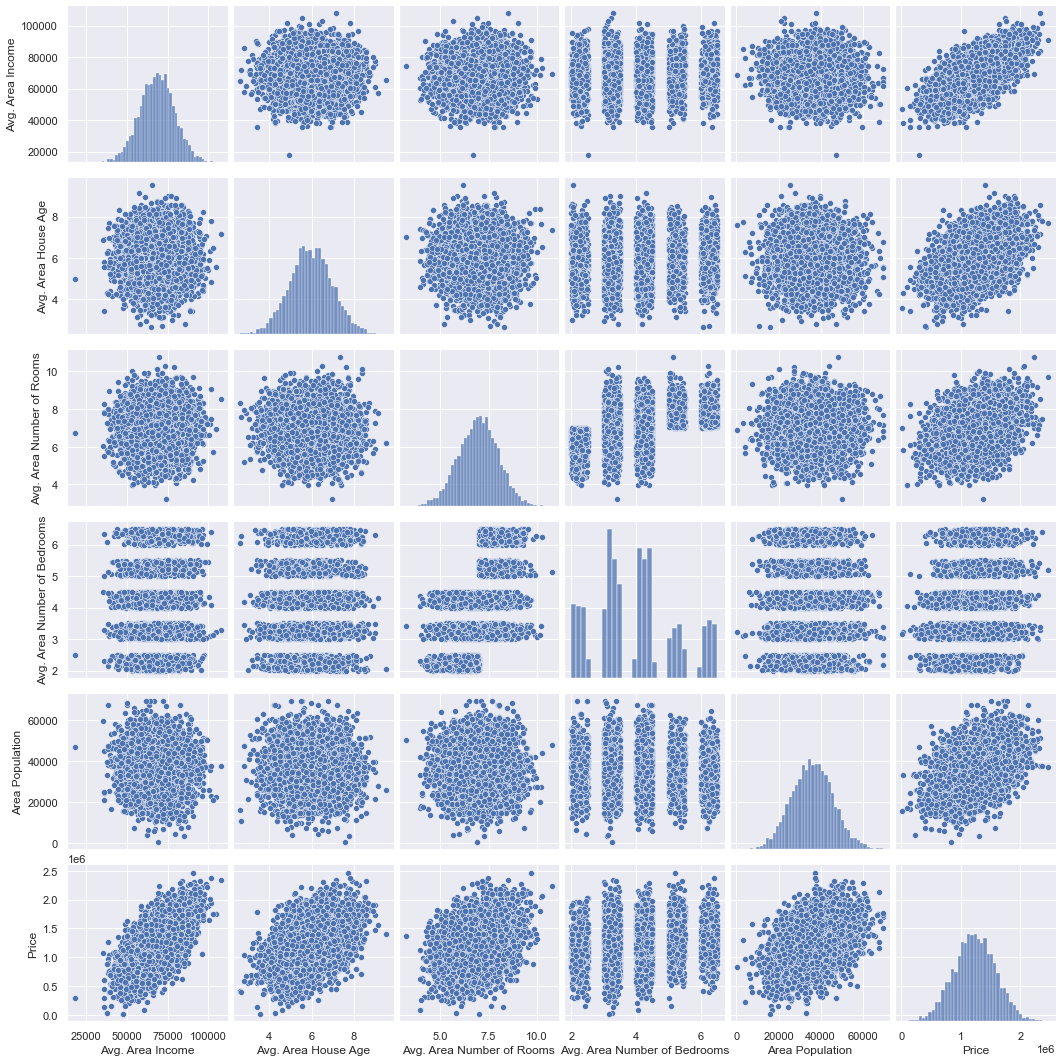

In [4]:
sns.pairplot(df)

<AxesSubplot:>

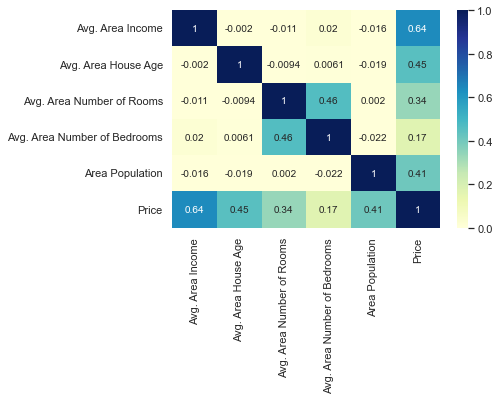

In [5]:
#Correlation Analysis
sns.heatmap(df.corr(),annot = True,vmin=0, vmax=1, cmap="YlGnBu")

# Prediction Error Plot

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer

from yellowbrick.regressor import PredictionError, ResidualsPlot

In [44]:
pt = PowerTransformer()
df_n = pd.DataFrame(df[['Avg. Area Income','Avg. Area House Age','Area Population'
                                         ,'Avg. Area Number of Rooms']]
                    , columns = ['Avg. Area Income','Avg. Area House Age'
                                 ,'Area Population','Avg. Area Number of Rooms'])

df_n = df_n.merge(df.Price,left_index = True,right_index = True)

In [46]:
X_train, X_test, y_train, y_test  = train_test_split(df_n.iloc[:,:-1], df_n.Price, test_size=0.3)
X_train = 

In [49]:
model = LinearRegression(normalize = True)

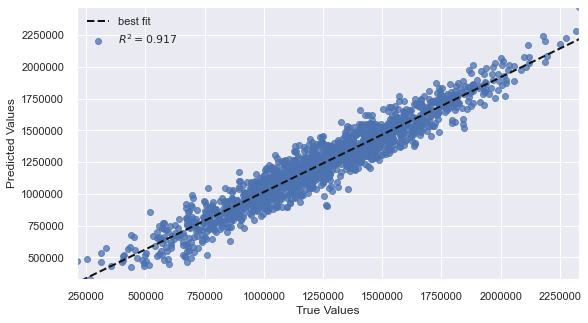

In [132]:
plt.figure(figsize=(9,5))

perror = PredictionError(model)
perror.fit(X_train, y_train)
perror.score(X_test, y_test)

plt.ticklabel_format(style='plain')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Residuals Plot

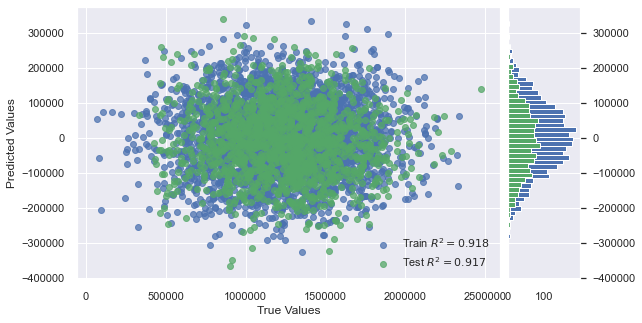

In [135]:
plt.figure(figsize=(9,5))

rplot = ResidualsPlot(model)
rplot.fit(X_train, y_train)
rplot.score(X_test, y_test)

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()